In [3]:
import coin
import importlib
import pandas as pd
import logging
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import traceback

In [4]:
logging.basicConfig(
    format="[%(levelname)s]%(asctime)s %(message)s", 
    datefmt="%Y-%m-%d %H:%M:%S",
    filename="simple.log",
    level=logging.DEBUG
)

In [36]:
n_sample = int(2e4)
W = 120 * 1000 # 観測値

e_muT, v_muT = 200, 100 # 投入回数の事前分布の期待値と標準偏差
e_vW, v_vW = 10, 100 # 観測誤差の標準偏差の事前分布の期待値・標準偏差
v_muT_, v_vW_ = 3, 3 # muT, vWの提案分布の標準偏差

T_i = 200
M_i = [500] * T_i
muT_i = 200
vW_i = 10

In [37]:
importlib.reload(coin)
try:
    samples, lls, proposed = coin.run(
        n_sample,
        W,
        [e_muT, v_muT, e_vW, v_vW, v_muT_, v_vW_],
        coin.Simple.Param(T_i, M_i, muT_i, vW_i),
        coin.Simple,
        seed = 1,
        print_step = 2000
    )
except coin.McmcException as e:
    samples, lls, proposed = e.ret
    traceback.print_exec()

2000-th step begins: 4.799436807632446
4000-th step begins: 8.48169994354248
6000-th step begins: 11.800671100616455
8000-th step begins: 14.933795928955078
10000-th step begins: 18.22956895828247
12000-th step begins: 21.8083758354187
14000-th step begins: 25.293055057525635
16000-th step begins: 28.607527017593384
18000-th step begins: 32.06222081184387
20000-th step begins: 35.53498291969299


In [38]:
df = pd.DataFrame(dict(
    T = [p.T for p in samples],
    muT = [p.muT for p in samples],
    vW = [p.vW for p in samples]
))
df.tail(1)

,T,muT,vW
19999,244,223.945572,10.63656


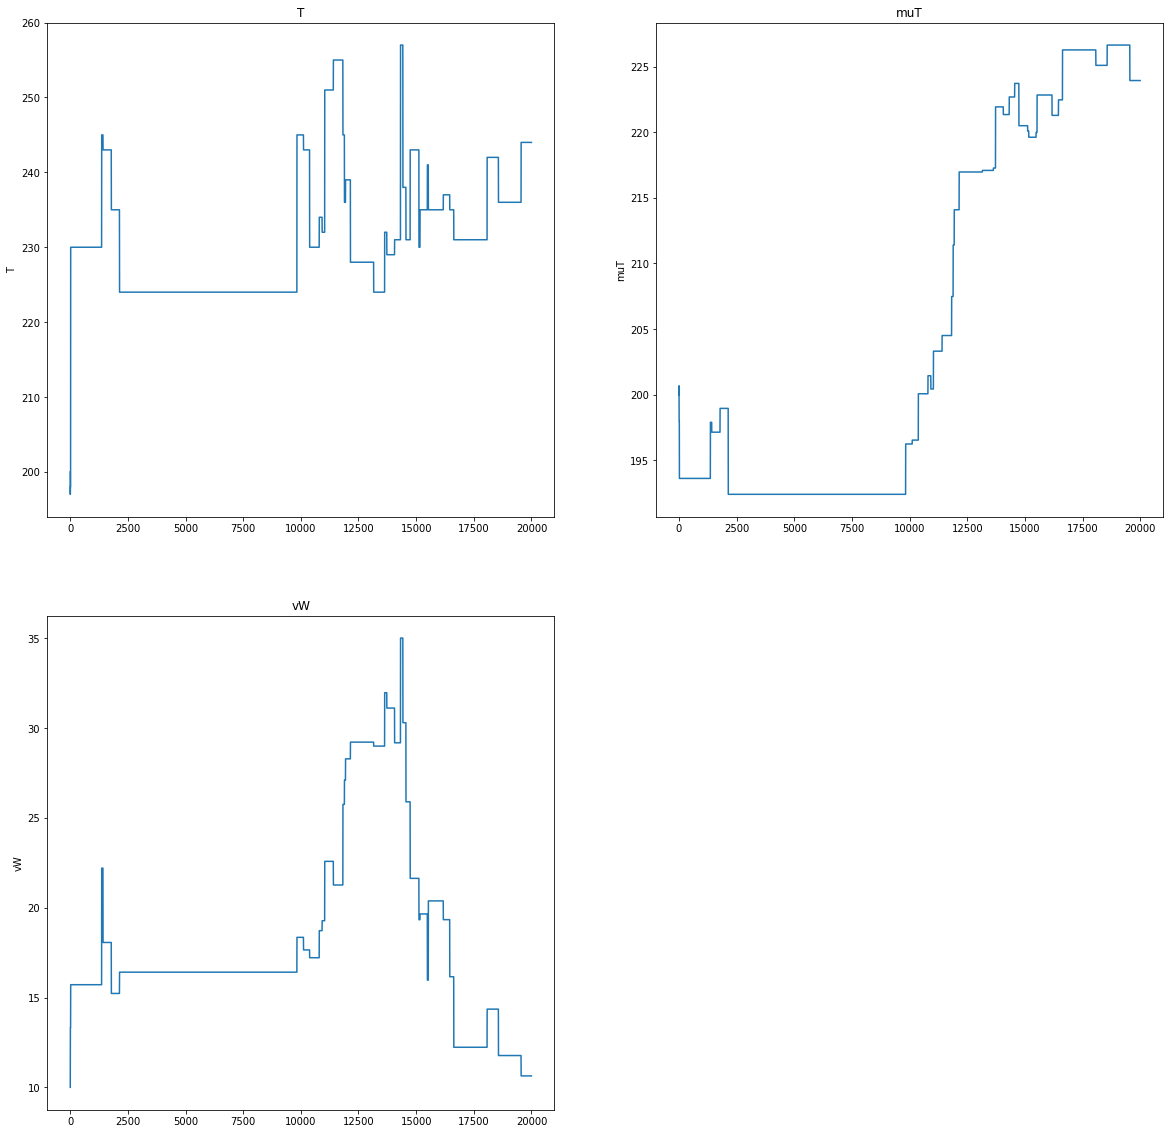

In [39]:
fig = plt.figure(figsize=(20,20))
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(2, 2, i+1)
    sns.lineplot(range(len(df)), df[c])
    ax.set_title(c)